Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 127ms/step
Training Bernoulli Naive Bayes...
Performance metrics for Bernoulli Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



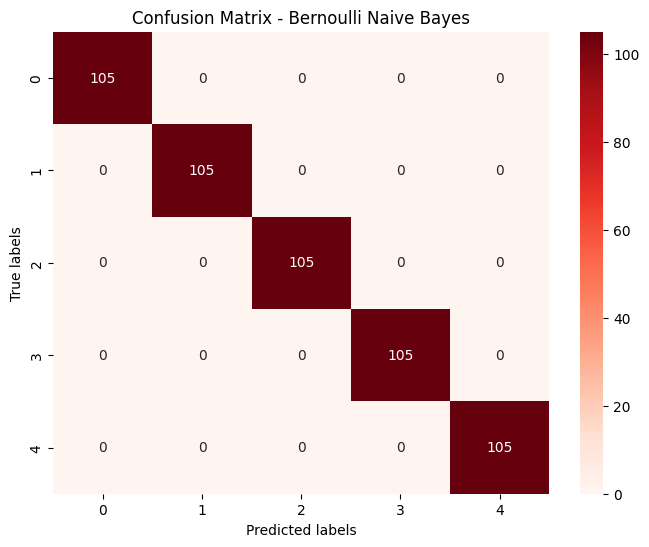

Training Multinomial Naive Bayes...
Performance metrics for Multinomial Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.39      0.47       105
           1       0.37      0.64      0.47       105
           2       0.40      0.28      0.33       105
           3       0.57      0.40      0.47       105
           4       0.52      0.63      0.57       105

    accuracy                           0.47       525
   macro avg       0.49      0.47      0.46       525
weighted avg       0.49      0.47      0.46       525

Accuracy: 0.4666666666666667
Sensitivity: 0.4666666666666666
Precision: 0.4889642971894498
F1 Score: 0.46028717622874965



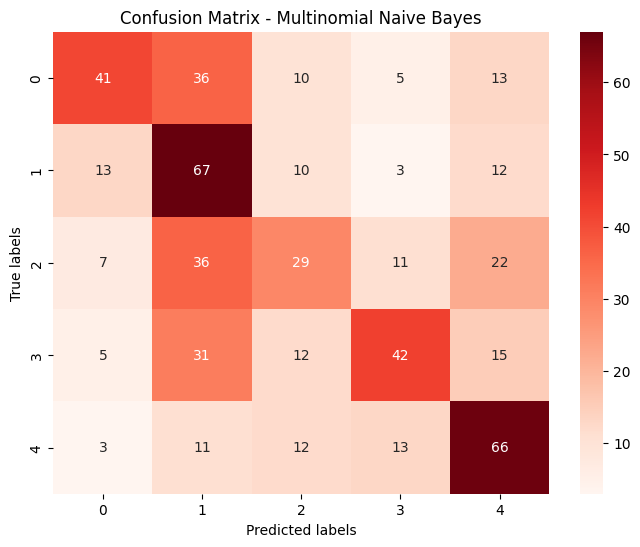

Training Complement Naive Bayes...
Performance metrics for Complement Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.37      0.46       105
           1       0.34      0.63      0.44       105
           2       0.68      0.12      0.21       105
           3       0.57      0.37      0.45       105
           4       0.42      0.72      0.53       105

    accuracy                           0.44       525
   macro avg       0.52      0.44      0.42       525
weighted avg       0.52      0.44      0.42       525

Accuracy: 0.4438095238095238
Sensitivity: 0.4438095238095238
Precision: 0.5229242502423617
F1 Score: 0.41889252000658617



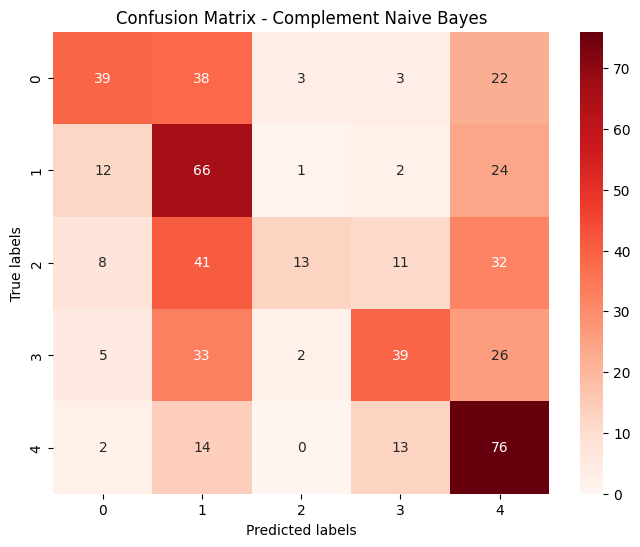

Training Gaussian Naive Bayes...
Performance metrics for Gaussian Naive Bayes:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.66      0.75       105
           1       0.51      0.95      0.66       105
           2       0.82      0.59      0.69       105
           3       0.86      0.65      0.74       105
           4       0.84      0.76      0.80       105

    accuracy                           0.72       525
   macro avg       0.78      0.72      0.73       525
weighted avg       0.78      0.72      0.73       525

Accuracy: 0.7219047619047619
Sensitivity: 0.7219047619047619
Precision: 0.7821767656652691
F1 Score: 0.7281126647991325



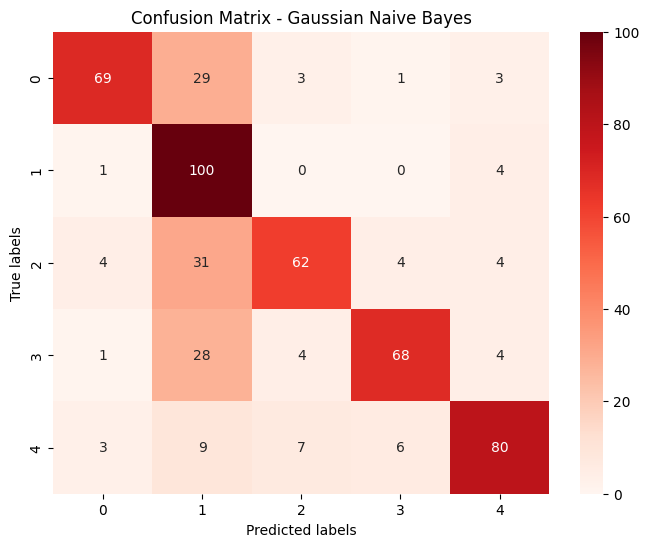

In [2]:
# Import necessary libraries
import os
import numpy as np
from keras.applications.efficientnet import EfficientNetB2, preprocess_input
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/DR_700/Train'
test_dir = '/content/drive/MyDrive/A/DR_700/Test'
# Load model for feature extraction
model = EfficientNetB2(weights='imagenet', include_top=False)
# Function to extract features from an image using EfficientNetB3
def extract_features_efficientnet(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features
# Load images and extract features
x_train, y_train = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet(os.path.join(class_dir, img_path))
        x_train.append(features)
        y_train.append(i)
# Load images and extract features
x_test, y_test = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet(os.path.join(class_dir, img_path))
        x_test.append(features)
        y_test.append(i)
import torch

# Load the model using torch.load
model_classification = torch.load('/content/drive/MyDrive/NewModel.h5')

# Function to classify features using NewModel.h5
def classify_features(features):
    # Convert features to torch tensor
    features_tensor = torch.tensor(features)

    # Set the model to evaluation mode
    model_classification.eval()

    # Forward pass
    with torch.no_grad():
        predictions = model_classification(features_tensor)

    # Get the predicted classes
    _, predicted_classes = torch.max(predictions, 1)

    return predicted_classes.numpy()
import matplotlib.pyplot as plt
# Flatten the features
x_train_flat = np.array([feature.flatten() for feature in x_train])
x_test_flat = np.array([feature.flatten() for feature in x_test])

# Scale the input features to the range [0, 1]
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

# Ensure non-negative values
min_value = np.min(np.concatenate([x_train_scaled, x_test_scaled]))
x_train_scaled_non_negative = x_train_scaled - min_value
x_test_scaled_non_negative = x_test_scaled - min_value

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative, y_train)
    # Predict on test set
    y_pred = clf.predict(x_test_scaled_non_negative)
    # Print performance metrics
    print(f'Performance metrics for {clf_name}:')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))
    # Additional performance metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    sensitivity = metrics.recall_score(y_test, y_pred, average='macro')
    precision = metrics.precision_score(y_test, y_pred, average='macro')
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    print(f'Accuracy: {accuracy}')
    print(f'Sensitivity: {sensitivity}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}\n')
    # Plot confusion matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)

    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
